In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as model_selection
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.callbacks as callbacks

In [3]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import plot_model 

In [4]:
from keras.applications.resnet_v2 import ResNet50V2

In [5]:
def plot_loss_metrics(history, metrics, validation_metrics=True, all_in_one=False, figsize=(10, 6)):
    '''
    Plots loss and metric curves from the history object

    Args:
        history: Tensorflow History object.\n
        metrics: Metrics to plot curves for other than loss.\n
        validation_metrics: {default: True} If False, will not plot metrics for validation data.\n
        all_in_one: {default: False} If True, will plot all curves on a single figure.\n
        figsize: A tuple holding the figure size to plot on.
    '''

    history_df = pd.DataFrame(history.history)
    epochs = range(len(history_df))

    plt.figure(figsize=figsize)
    history_df['loss'].plot(x=epochs)
    if validation_metrics:
        history_df['val_loss'].plot(x=epochs)
    plt.title('Loss Curve')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()

    for metric in metrics:
        if not all_in_one:
            plt.figure(figsize=figsize)
        history_df[metric].plot(x=epochs)
        if validation_metrics:
            history_df['val_' + metric].plot(x=epochs)
        plt.title(metric[0].upper() + metric[1:] + ' Curve')
        plt.ylabel(metric)
        plt.xlabel('epochs')
        plt.legend()

In [6]:
positive = pd.read_csv('/content/drive/MyDrive/Covid-19 CT-Scan Model/Data_2/SARS-Cov-2/COVID.txt', sep=' ')
negative = pd.read_csv('/content/drive/MyDrive/Covid-19 CT-Scan Model/Data_2/SARS-Cov-2/non-COVID.txt', sep=' ')
negative.tail()

,Sample,Filepath,Image,Label
1225,non-COVID,../data/SARS-Cov-2/non-COVID/Non-Covid,(602).png,normal
1226,non-COVID,../data/SARS-Cov-2/non-COVID/Non-Covid,(395).png,normal
1227,non-COVID,../data/SARS-Cov-2/non-COVID/Non-Covid,(1126).png,normal
1228,non-COVID,../data/SARS-Cov-2/non-COVID/Non-Covid,(798).png,normal
1229,non-COVID,../data/SARS-Cov-2/non-COVID/Non-Covid,(1222).png,normal


In [7]:
positive['Filepath'] = '/content/drive/MyDrive/Covid-19 CT-Scan Model/Data_2/SARS-Cov-2/Image_samples'
negative['Filepath'] = '/content/drive/MyDrive/Covid-19 CT-Scan Model/Data_2/SARS-Cov-2/Image_samples'
positive.head()

,Sample,Filepath,Image,Label
0,COVID,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,(731).png,COVID-19
1,COVID,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,(1013).png,COVID-19
2,COVID,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,(454).png,COVID-19
3,COVID,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,(465).png,COVID-19
4,COVID,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,(982).png,COVID-19


In [8]:
positive['Sample'] = 'Covid'
negative['Sample'] = 'Non-Covid'
positive.head()

,Sample,Filepath,Image,Label
0,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,(731).png,COVID-19
1,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,(1013).png,COVID-19
2,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,(454).png,COVID-19
3,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,(465).png,COVID-19
4,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,(982).png,COVID-19


In [9]:
positive['Image'] = positive[['Sample', 'Image']].agg(' '.join, axis=1)
negative['Image'] = negative[['Sample', 'Image']].agg(' '.join, axis=1)
negative.head()

,Sample,Filepath,Image,Label
0,Non-Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,Non-Covid (862).png,normal
1,Non-Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,Non-Covid (302).png,normal
2,Non-Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,Non-Covid (1201).png,normal
3,Non-Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,Non-Covid (241).png,normal
4,Non-Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,Non-Covid (183).png,normal


In [10]:
positive['Image'] = positive[['Filepath', 'Image']].agg('/'.join, axis=1)
negative['Image'] = negative[['Filepath', 'Image']].agg('/'.join, axis=1)
negative.head()

,Sample,Filepath,Image,Label
0,Non-Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,normal
1,Non-Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,normal
2,Non-Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,normal
3,Non-Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,normal
4,Non-Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,normal


In [11]:
positive.drop('Filepath', inplace=True, axis=1)
negative.drop('Filepath', inplace=True, axis=1)

positive.tail()

,Sample,Image,Label
1247,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,COVID-19
1248,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,COVID-19
1249,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,COVID-19
1250,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,COVID-19
1251,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,COVID-19


In [12]:
positive['Label'] = 1
negative['Label'] = 0
positive.head()

,Sample,Image,Label
0,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
1,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
2,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
3,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
4,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1


In [13]:
datapath = pd.concat([positive, negative], ignore_index=1)
datapath

,Sample,Image,Label
0,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
1,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
2,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
3,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
4,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
...,...,...,...
2477,Non-Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
2478,Non-Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
2479,Non-Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
2480,Non-Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0


In [14]:
np.random.seed(42)
datapath = pd.DataFrame.sample(datapath,
                               n=2482,
                               ignore_index=True)
datapath

,Sample,Image,Label
0,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
1,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
2,Non-Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
3,Non-Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
4,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
...,...,...,...
2477,Non-Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
2478,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
2479,Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
2480,Non-Covid,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0


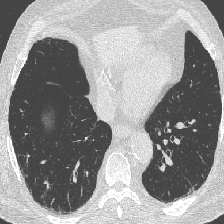

In [15]:
# Testing...
image = tf.keras.preprocessing.image.load_img(datapath.loc[0].at['Image'],
                                              color_mode='rgb',
                                              target_size=(224, 224))
image

In [16]:
image_data = []
image_label = []

for index, row in datapath.iterrows():
  image = tf.keras.preprocessing.image.load_img(datapath.loc[index].at["Image"],
                                                color_mode='rgb',
                                                target_size=(224, 224))
  image = np.array(image)
  image_data.append(image)
  image_label.append(datapath.loc[index].at['Label'])

In [17]:
print(len(image_data))
print(len(image_label))

2482
2482


In [18]:
train_data = np.array(image_data[:1737]) # 80 percent
val_data = np.array(image_data[1737:2233]) # 20 percent
test_data = np.array(image_data[2233:2482]) # 10 percent

train_label = image_label[:1737]
val_label = image_label[1737:2233]
test_label = image_label[2233:2482]

In [19]:
len(train_label) + len(val_label) + len(test_label)

2482

In [20]:
# normalize the data
X_train = train_data.astype('float32') / 225
X_val = val_data.astype('float32') / 225
X_test = test_data.astype('float32') / 225

In [21]:
print(np.shape(X_train))
print(np.shape(X_val))
print(np.shape(X_test))

(1737, 224, 224, 3)
(496, 224, 224, 3)
(249, 224, 224, 3)


In [22]:
y_train = tf.one_hot(train_label, depth = 2)
y_val = tf.one_hot(val_label, depth = 2)
y_test = tf.one_hot(test_label, depth = 2)

In [23]:
np.shape(y_train), np.shape(y_val), np.shape(y_test)

(TensorShape([1737, 2]), TensorShape([496, 2]), TensorShape([249, 2]))

# Model Implementation
* `ResNet-` pretrained on Imagenet

In [24]:
model = ResNet50V2(weights='imagenet',
                   include_top=False,
                   input_shape=(224, 224, 3))
model.summary()

94668760/94668760 [==============================] - 5s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [25]:
for layer in model.layers[:154]:
  layer.trainable = False

for i, layer in enumerate(model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

In [26]:
# Creating our model head
x = model.output
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(2, activation='sigmoid')(x)

transfer_model = tf.keras.Model(inputs=model.input, outputs=x)

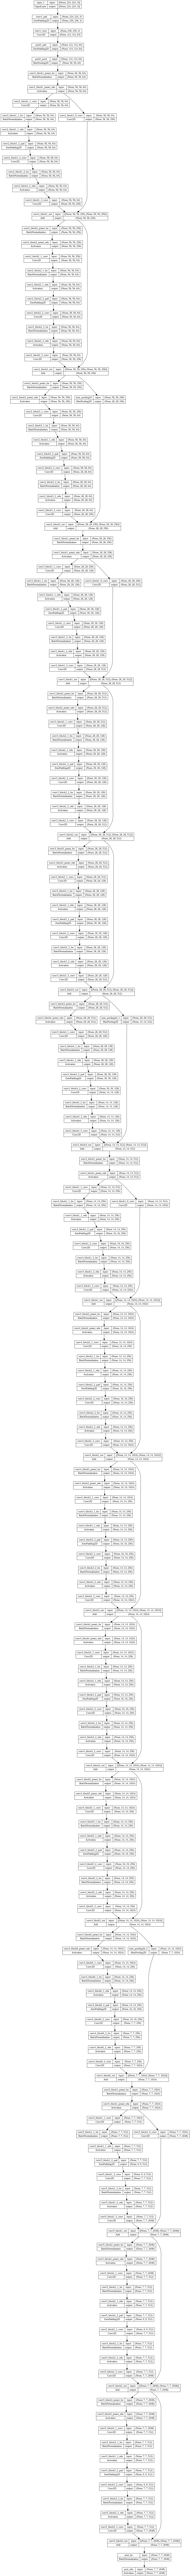

In [27]:
plot_model(model, show_shapes=True)

In [28]:
# Defining callbacks
earlystopping_val_acc = EarlyStopping(monitor='val_accuracy', patience=10,
                                      restore_best_weights=True)
early_stopping_val_loss = EarlyStopping(monitor='val_loss', patience=5,
                                        restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Covid-19 CT-Scan Model/Model checkpoints 3',
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5,
                              patience=8, verbose=1, mode='max', min_lr=5e-5)

In [29]:
learning_rate = 5e-5
transfer_model.compile(loss='binary_crossentropy',
                       optimizer=optimizers.Adam(lr=learning_rate),
                       metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [30]:
history = transfer_model.fit(X_train, y_train,
                             batch_size=30,
                             epochs=50,
                             initial_epoch=0,
                             shuffle=True,
                             validation_data=(X_val, y_val),
                             callbacks=[earlystopping_val_acc,
                                        early_stopping_val_loss,
                                        checkpoint])

Epoch 1/50
58/58 [==============================] - ETA: 0s - loss: 0.4855 - accuracy: 0.8025
Epoch 1: val_accuracy improved from -inf to 0.87097, saving model to /content/drive/MyDrive/Covid-19 CT-Scan Model/Model checkpoints 3


58/58 [==============================] - 49s 653ms/step - loss: 0.4855 - accuracy: 0.8025 - val_loss: 0.3198 - val_accuracy: 0.8710
Epoch 2/50
58/58 [==============================] - ETA: 0s - loss: 0.0539 - accuracy: 0.9862
Epoch 2: val_accuracy improved from 0.87097 to 0.91734, saving model to /content/drive/MyDrive/Covid-19 CT-Scan Model/Model checkpoints 3


58/58 [==============================] - 32s 563ms/step - loss: 0.0539 - accuracy: 0.9862 - val_loss: 0.2302 - val_accuracy: 0.9173
Epoch 3/50
58/58 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9983
Epoch 3: val_accuracy improved from 0.91734 to 0.92540, saving model to /content/drive/MyDrive/Covid-19 CT-Scan Model/Model checkpoints 3


58/58 [==============================] - 32s 566ms/step - loss: 0.0113 - accuracy: 0.9983 - val_loss: 0.2267 - val_accuracy: 0.9254
Epoch 4/50
58/58 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 1.0000
Epoch 4: val_accuracy improved from 0.92540 to 0.95363, saving model to /content/drive/MyDrive/Covid-19 CT-Scan Model/Model checkpoints 3


58/58 [==============================] - 33s 581ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1844 - val_accuracy: 0.9536
Epoch 5/50
58/58 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 5: val_accuracy improved from 0.95363 to 0.95766, saving model to /content/drive/MyDrive/Covid-19 CT-Scan Model/Model checkpoints 3


58/58 [==============================] - 32s 561ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1236 - val_accuracy: 0.9577
Epoch 6/50
58/58 [==============================] - ETA: 0s - loss: 9.8803e-04 - accuracy: 1.0000
Epoch 6: val_accuracy improved from 0.95766 to 0.95968, saving model to /content/drive/MyDrive/Covid-19 CT-Scan Model/Model checkpoints 3


58/58 [==============================] - 32s 560ms/step - loss: 9.8803e-04 - accuracy: 1.0000 - val_loss: 0.1267 - val_accuracy: 0.9597
Epoch 7/50
58/58 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9994
Epoch 7: val_accuracy improved from 0.95968 to 0.96169, saving model to /content/drive/MyDrive/Covid-19 CT-Scan Model/Model checkpoints 3


58/58 [==============================] - 32s 565ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.1256 - val_accuracy: 0.9617
Epoch 8/50
58/58 [==============================] - ETA: 0s - loss: 5.6712e-04 - accuracy: 1.0000
Epoch 8: val_accuracy improved from 0.96169 to 0.96371, saving model to /content/drive/MyDrive/Covid-19 CT-Scan Model/Model checkpoints 3


58/58 [==============================] - 34s 587ms/step - loss: 5.6712e-04 - accuracy: 1.0000 - val_loss: 0.1288 - val_accuracy: 0.9637
Epoch 9/50
58/58 [==============================] - ETA: 0s - loss: 7.5434e-04 - accuracy: 1.0000
Epoch 9: val_accuracy did not improve from 0.96371
58/58 [==============================] - 9s 158ms/step - loss: 7.5434e-04 - accuracy: 1.0000 - val_loss: 0.1275 - val_accuracy: 0.9556
Epoch 10/50
58/58 [==============================] - ETA: 0s - loss: 2.5455e-04 - accuracy: 1.0000
Epoch 10: val_accuracy did not improve from 0.96371
58/58 [==============================] - 10s 166ms/step - loss: 2.5455e-04 - accuracy: 1.0000 - val_loss: 0.1371 - val_accuracy: 0.9536


In [31]:
transfer_model.evaluate(X_test, y_test, batch_size=10) 

25/25 [==============================] - 2s 60ms/step - loss: 0.1864 - accuracy: 0.9518


[0.18639624118804932, 0.9518072009086609]

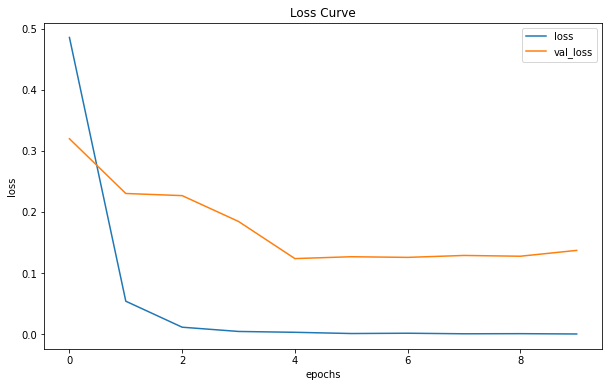

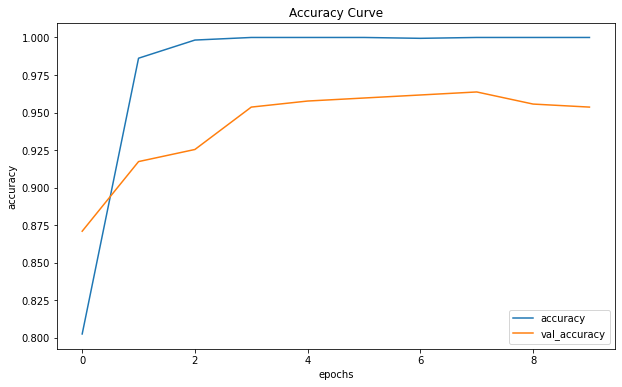

In [32]:
plot_loss_metrics(history, metrics=['accuracy'])